Sorting Arrays:
    np.sort => Quicksort , O[N LOg N]
	np.argsort => index of sorted value
	Partial Sorts
	Partitioning
	k-Nearest Neighbours

In [4]:
import numpy as np
a=np.array([8,5,3,7,10])
print(a)
print(np.sort(a))
print(np.argsort(a)) # a[2] ,a[1],a[3],a[0],a[4]


[ 8  5  3  7 10]
[ 3  5  7  8 10]
[2 1 3 0 4]


In [24]:
#Partial Sort 
x = np.array([7, 2, 3, 1, 6, 5, 4])
print(np.sort(x))
print(np.partition(x,5))
print(np.argpartition(x,5))


[1 2 3 4 5 6 7]
[2 1 3 4 5 6 7]
[1 3 2 6 5 4 0]


k-Nearest Neighbors:


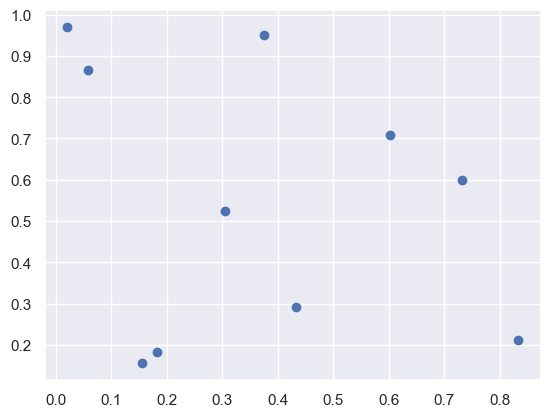

In [14]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
rand = np.random.RandomState(42)
X = rand.rand(10, 2)
plt.scatter(X[:, 0], X[:, 1]);

In [18]:
# Distance 
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
print(differences.shape)
sq_differences = differences ** 2
print(sq_differences.shape)
dist_sq = sq_differences.sum(-1)
print(dist_sq.shape)
#dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
#print(dist_sq.shape)

(10, 10, 2)
(10, 10, 2)
(10, 10)


In [22]:
print(dist_sq.diagonal())
print(dist_sq)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.         0.25171654 0.67933117 0.10729142 0.11021119 0.12565305
  0.75487265 0.62590345 0.1863819  0.43821601]
 [0.25171654 0.         0.52769893 0.52572083 0.02910074 0.64393098
  0.1593326  0.47512176 0.18843303 0.18454216]
 [0.67933117 0.52769893 0.         0.51394921 0.50290096 0.68080058
  0.46072414 0.00141727 0.15795558 0.09442377]
 [0.10729142 0.52572083 0.51394921 0.         0.31987984 0.01216687
  1.02713477 0.48148903 0.17716149 0.47033641]
 [0.11021119 0.02910074 0.50290096 0.31987984 0.         0.40557444
  0.29926414 0.45108072 0.12173825 0.20237694]
 [0.12565305 0.64393098 0.68080058 0.01216687 0.40557444 0.
  1.23302708 0.64458914 0.27862329 0.62982499]
 [0.75487265 0.1593326  0.46072414 1.02713477 0.29926414 1.23302708
  0.         0.42414057 0.37660024 0.16662198]
 [0.62590345 0.47512176 0.00141727 0.48148903 0.45108072 0.64458914
  0.42414057 0.         0.13150712 0.07418619]
 [0.1863819  0.18843303 0.15795558 0.17716149 0.12173825

In [23]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)


[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


In [25]:
K=2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
print(nearest_partition)

[[3 0 4 5 8 9 1 7 2 6]
 [1 4 6 9 3 5 2 7 8 0]
 [2 7 9 8 6 4 5 1 3 0]
 [3 5 0 8 4 1 6 7 2 9]
 [1 4 0 8 9 6 2 7 5 3]
 [5 3 0 8 4 1 6 7 2 9]
 [1 9 6 4 3 5 2 7 8 0]
 [7 2 9 8 6 4 5 1 3 0]
 [8 9 4 7 2 3 0 1 5 6]
 [8 7 9 2 1 6 4 5 3 0]]


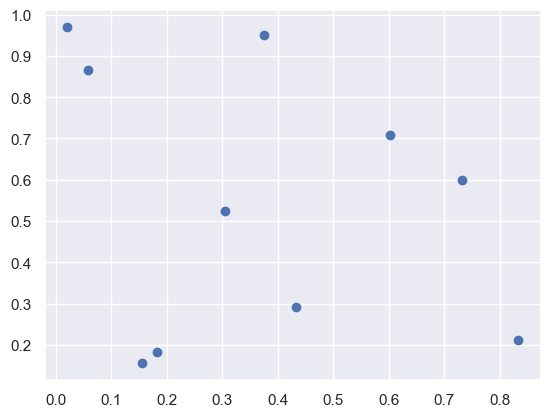

In [26]:
plt.scatter(X[:, 0], X[:, 1])

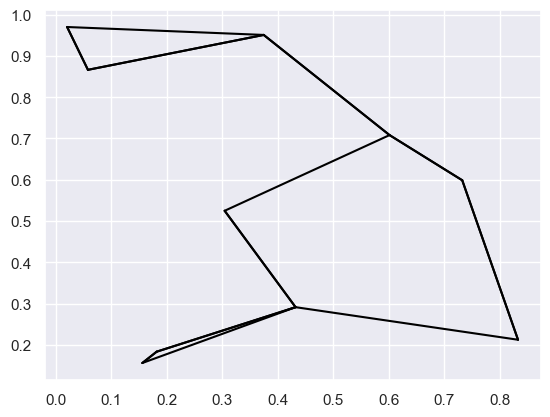

In [27]:
K=2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
          plt.plot(*zip(X[j], X[i]), color='black')

Structured Data
    NumPy’s Structured Arrays =>Hetero data type can be created
	Creating Structured Arrays
	Advanced Compound Types
	Structured Arrays

In [31]:
name=np.array(['a','b','c'])
age=np.array([1,2,3])
weight=np.array([20.0,30.5,18.5])

data= np.zeros(3, dtype={'names':('name','age','weight'),
                         'formats':('U10','i4','f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [32]:
data['name']=name
data['age']=age
data['weight']=weight
print(data)

[('a', 1, 20. ) ('b', 2, 30.5) ('c', 3, 18.5)]


In [43]:
#advanced compound types
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'])

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
